# Employee Salary Prediction - Classification
Employee salary prediction involves determining an employee's salary level based on a range of personal and organizational factors. This analysis helps organizations understand the factors influencing salary levels and enables better decision-making.

Use Cases for Salary Prediction:

Compensation Benchmarking: Organizations can compare salaries across various departments and positions to ensure fairness and competitiveness.
Budget Forecasting: Helps organizations allocate funds more effectively by understanding the distribution of salaries.
Career Path Analysis: Identifies the potential salary growth associated with different career paths, assisting in strategic planning.
In this analysis, the goal is to predict the salary level of an employee based on features like performance evaluation scores, work experience, department, and past promotio

## Steps

1. Import Library and Dataset
2. Data Preprocessing
    - Gethering dataset info
    - Data Statistics
    - Missing value handling 
    - columns operation
3. Categorical to Numerical 
4. Data Visualization
    - Get Insights
    - Outlier detection
    - Correlation 
5. Feature Selection
6. Train and Test Split
7. Model Building
    - Logistic Regression
    - Decision Tree
    - Random Forest
8. Model Evaluation

### Import Library and dataset

In [284]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [286]:
df = pd.read_csv('dataset.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



<br>


### Data Preprocessing

##### Data Info

In [287]:
df.shape

(14999, 10)

This dataset contains 10 columns (features) and 14999 rows (records)

##### Column list

In [288]:
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

##### dataframe info

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Here sales and salary columns are object (string) datatype

##### Missing Value Handing - Checking Null Value

In [290]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There is no null value (NaN)

##### Data statistics

In [291]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<br>

##### Change the column name

In [292]:
df = df.rename(columns={'sales' : 'department'})

In [293]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


##### Change the columns values 

The 'department' column of the dataset has many categories, need to reduce the categories for better modelling. 
Let’s see all the categories of the department column:

In [294]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<br>

### Categorical to Numerical - Feature Transformation

##### Label Encoder

In [295]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [296]:
# Example of mapping departments to broader groups
department_mapping = {
    'sales': 'sales',
    'accounting': 'finance',
    'hr': 'hr',
    'technical': 'technical_support',
    'support': 'technical_support',
    'management': 'management',
    'IT': 'technical_support',
    'product_mng': 'product_management',
    'marketing': 'marketing',
    'RandD': 'RandD'
}

# Apply the mapping to the department column
df['department'] = df['department'].map(department_mapping)

# Verify the new grouping by printing unique values
print(df['department'].unique())

# Now, continue with the encoding
depart = pd.get_dummies(df['department'], prefix='department', drop_first=True)

# Join the encoded DataFrame with the main DataFrame
df = df.join(depart)

['sales' 'finance' 'hr' 'technical_support' 'management'
 'product_management' 'marketing' 'RandD']


In [297]:
df.drop('department', axis=1, inplace=True)

In [298]:
salary_mapping = {
    "low": 0,
    "medium": 1,
    "high": 2
}
df['salary'] = df['salary'].map(salary_mapping)

In [299]:
df.shape

(14999, 16)

In [300]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_finance,department_hr,department_management,department_marketing,department_product_management,department_sales,department_technical_support
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,True,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,True,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,True,False


Now this dataset contains 16 columns (features) and 14999 rows (records)

<br>

### Data Visualization

##### Gets insights

<Axes: xlabel='satisfaction_level', ylabel='salary'>

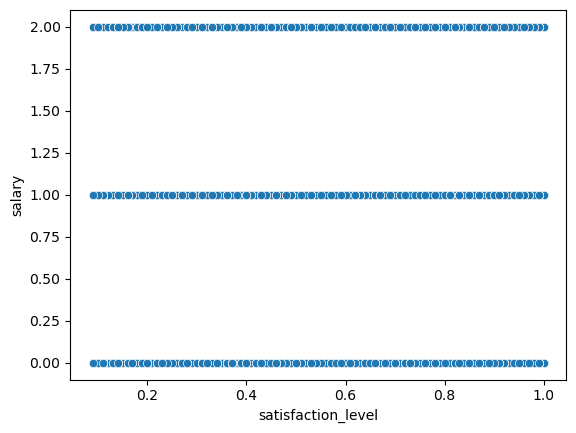

In [301]:
sns.scatterplot(x='satisfaction_level', y='salary', data=df)

<Axes: xlabel='last_evaluation', ylabel='salary'>

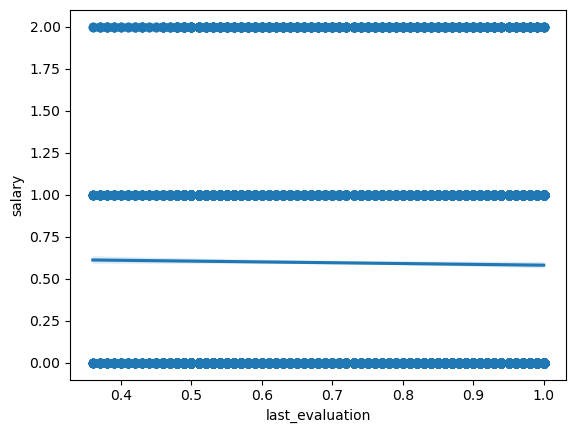

In [302]:
sns.regplot(x='last_evaluation', y='salary', data=df)

##### Distribution 

/var/folders/bz/scdw9ns950n544w3r_sxt1p00000gn/T/ipykernel_9002/3322082836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/bz/scdw9ns950n544w3r_sxt1p00000gn/T/ipykernel_9002/3322082836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/bz/scdw9ns9

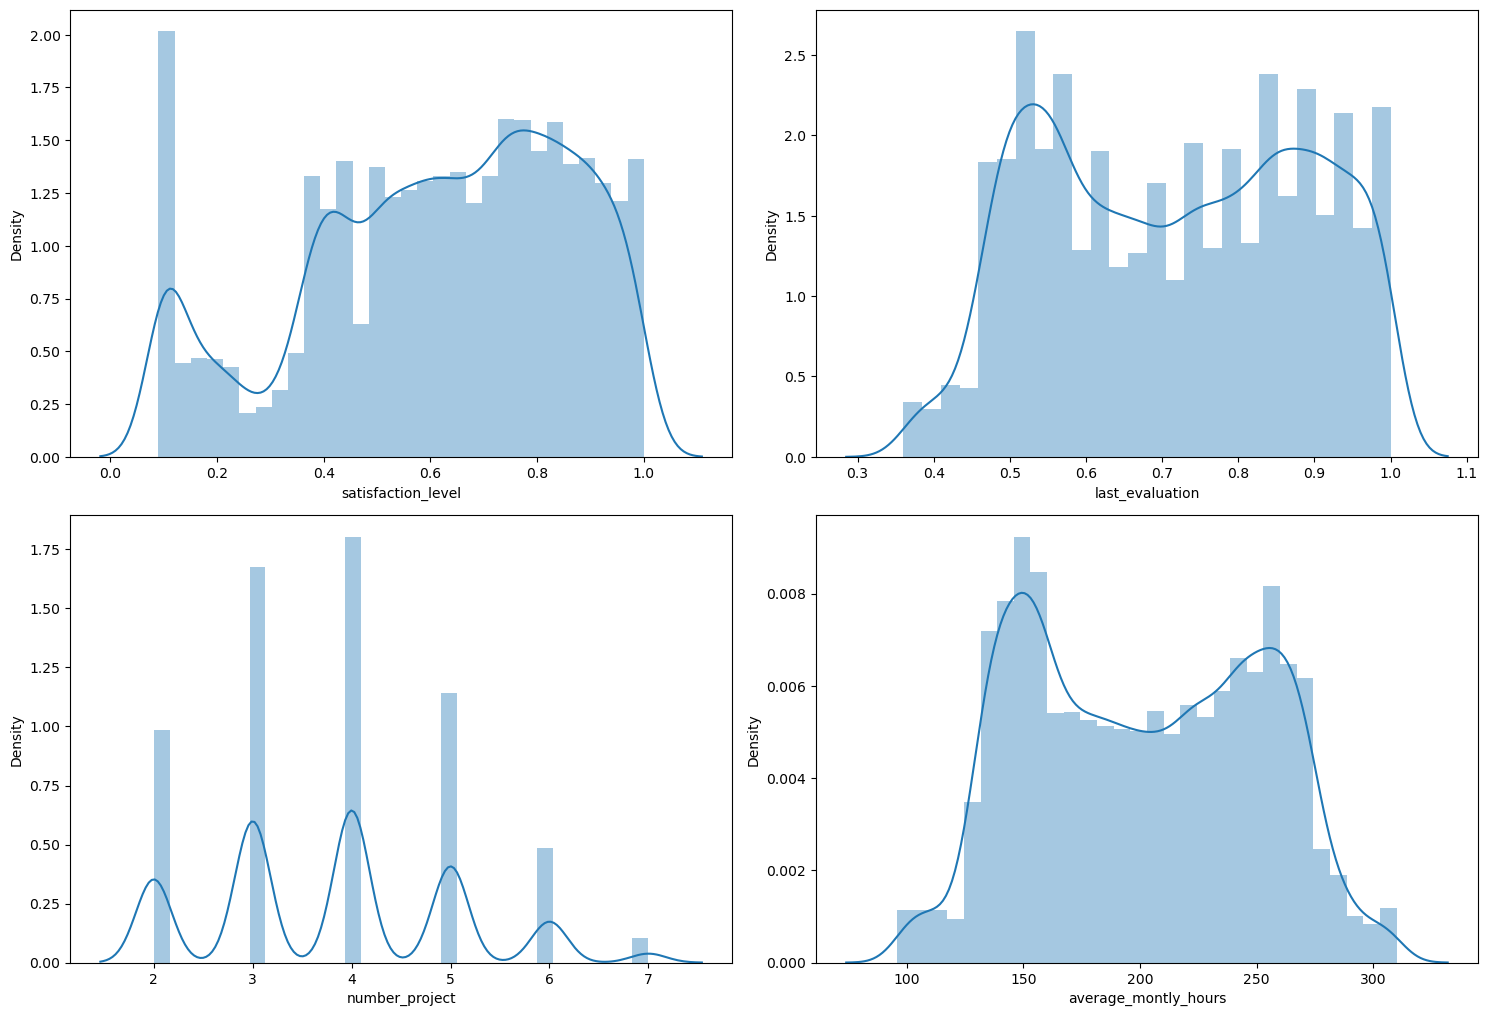

In [303]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

#### Outlier handing

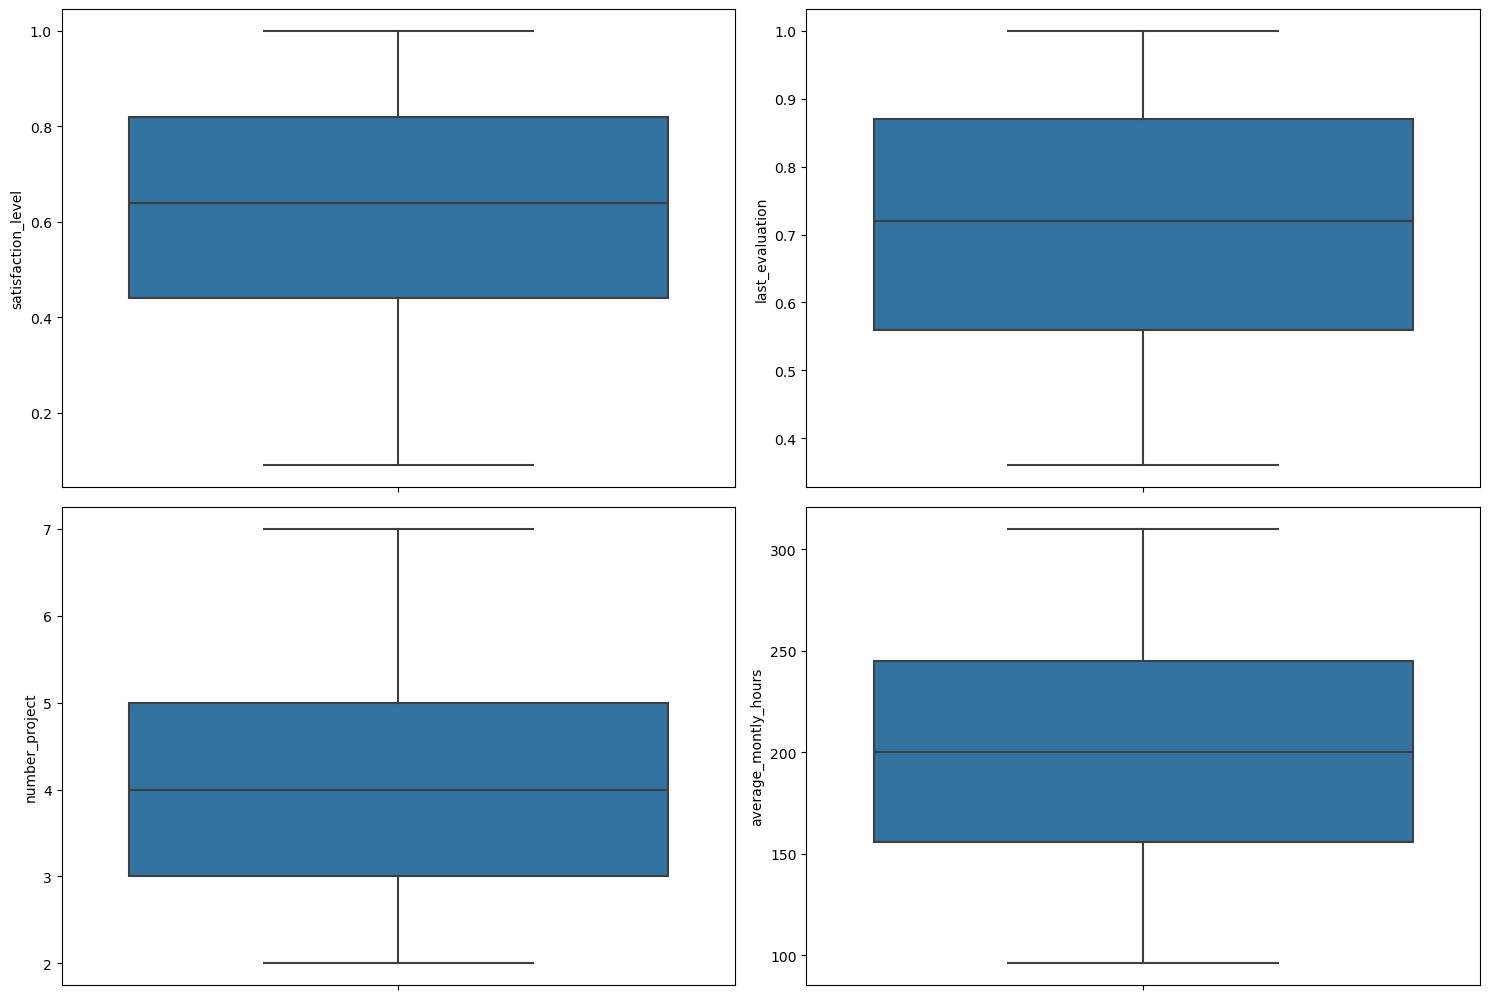

In [304]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.boxplot(y=df[col])
    plt_num += 1
plt.tight_layout()

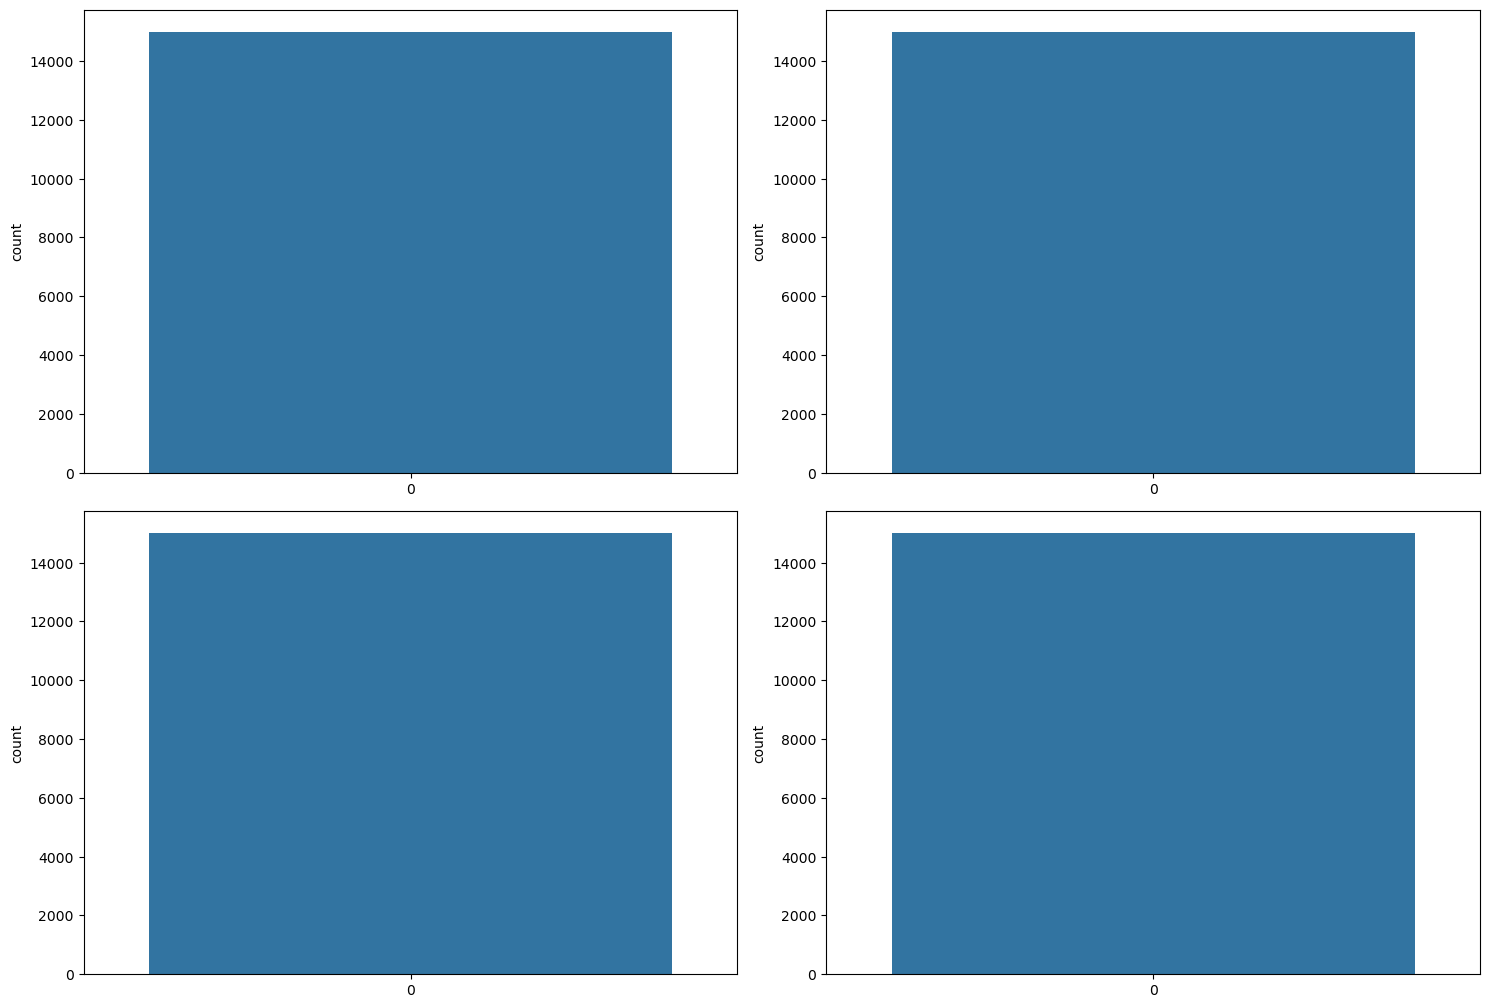

In [305]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.countplot(df[col])
    plt_num += 1
plt.tight_layout()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/manoj/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._fi

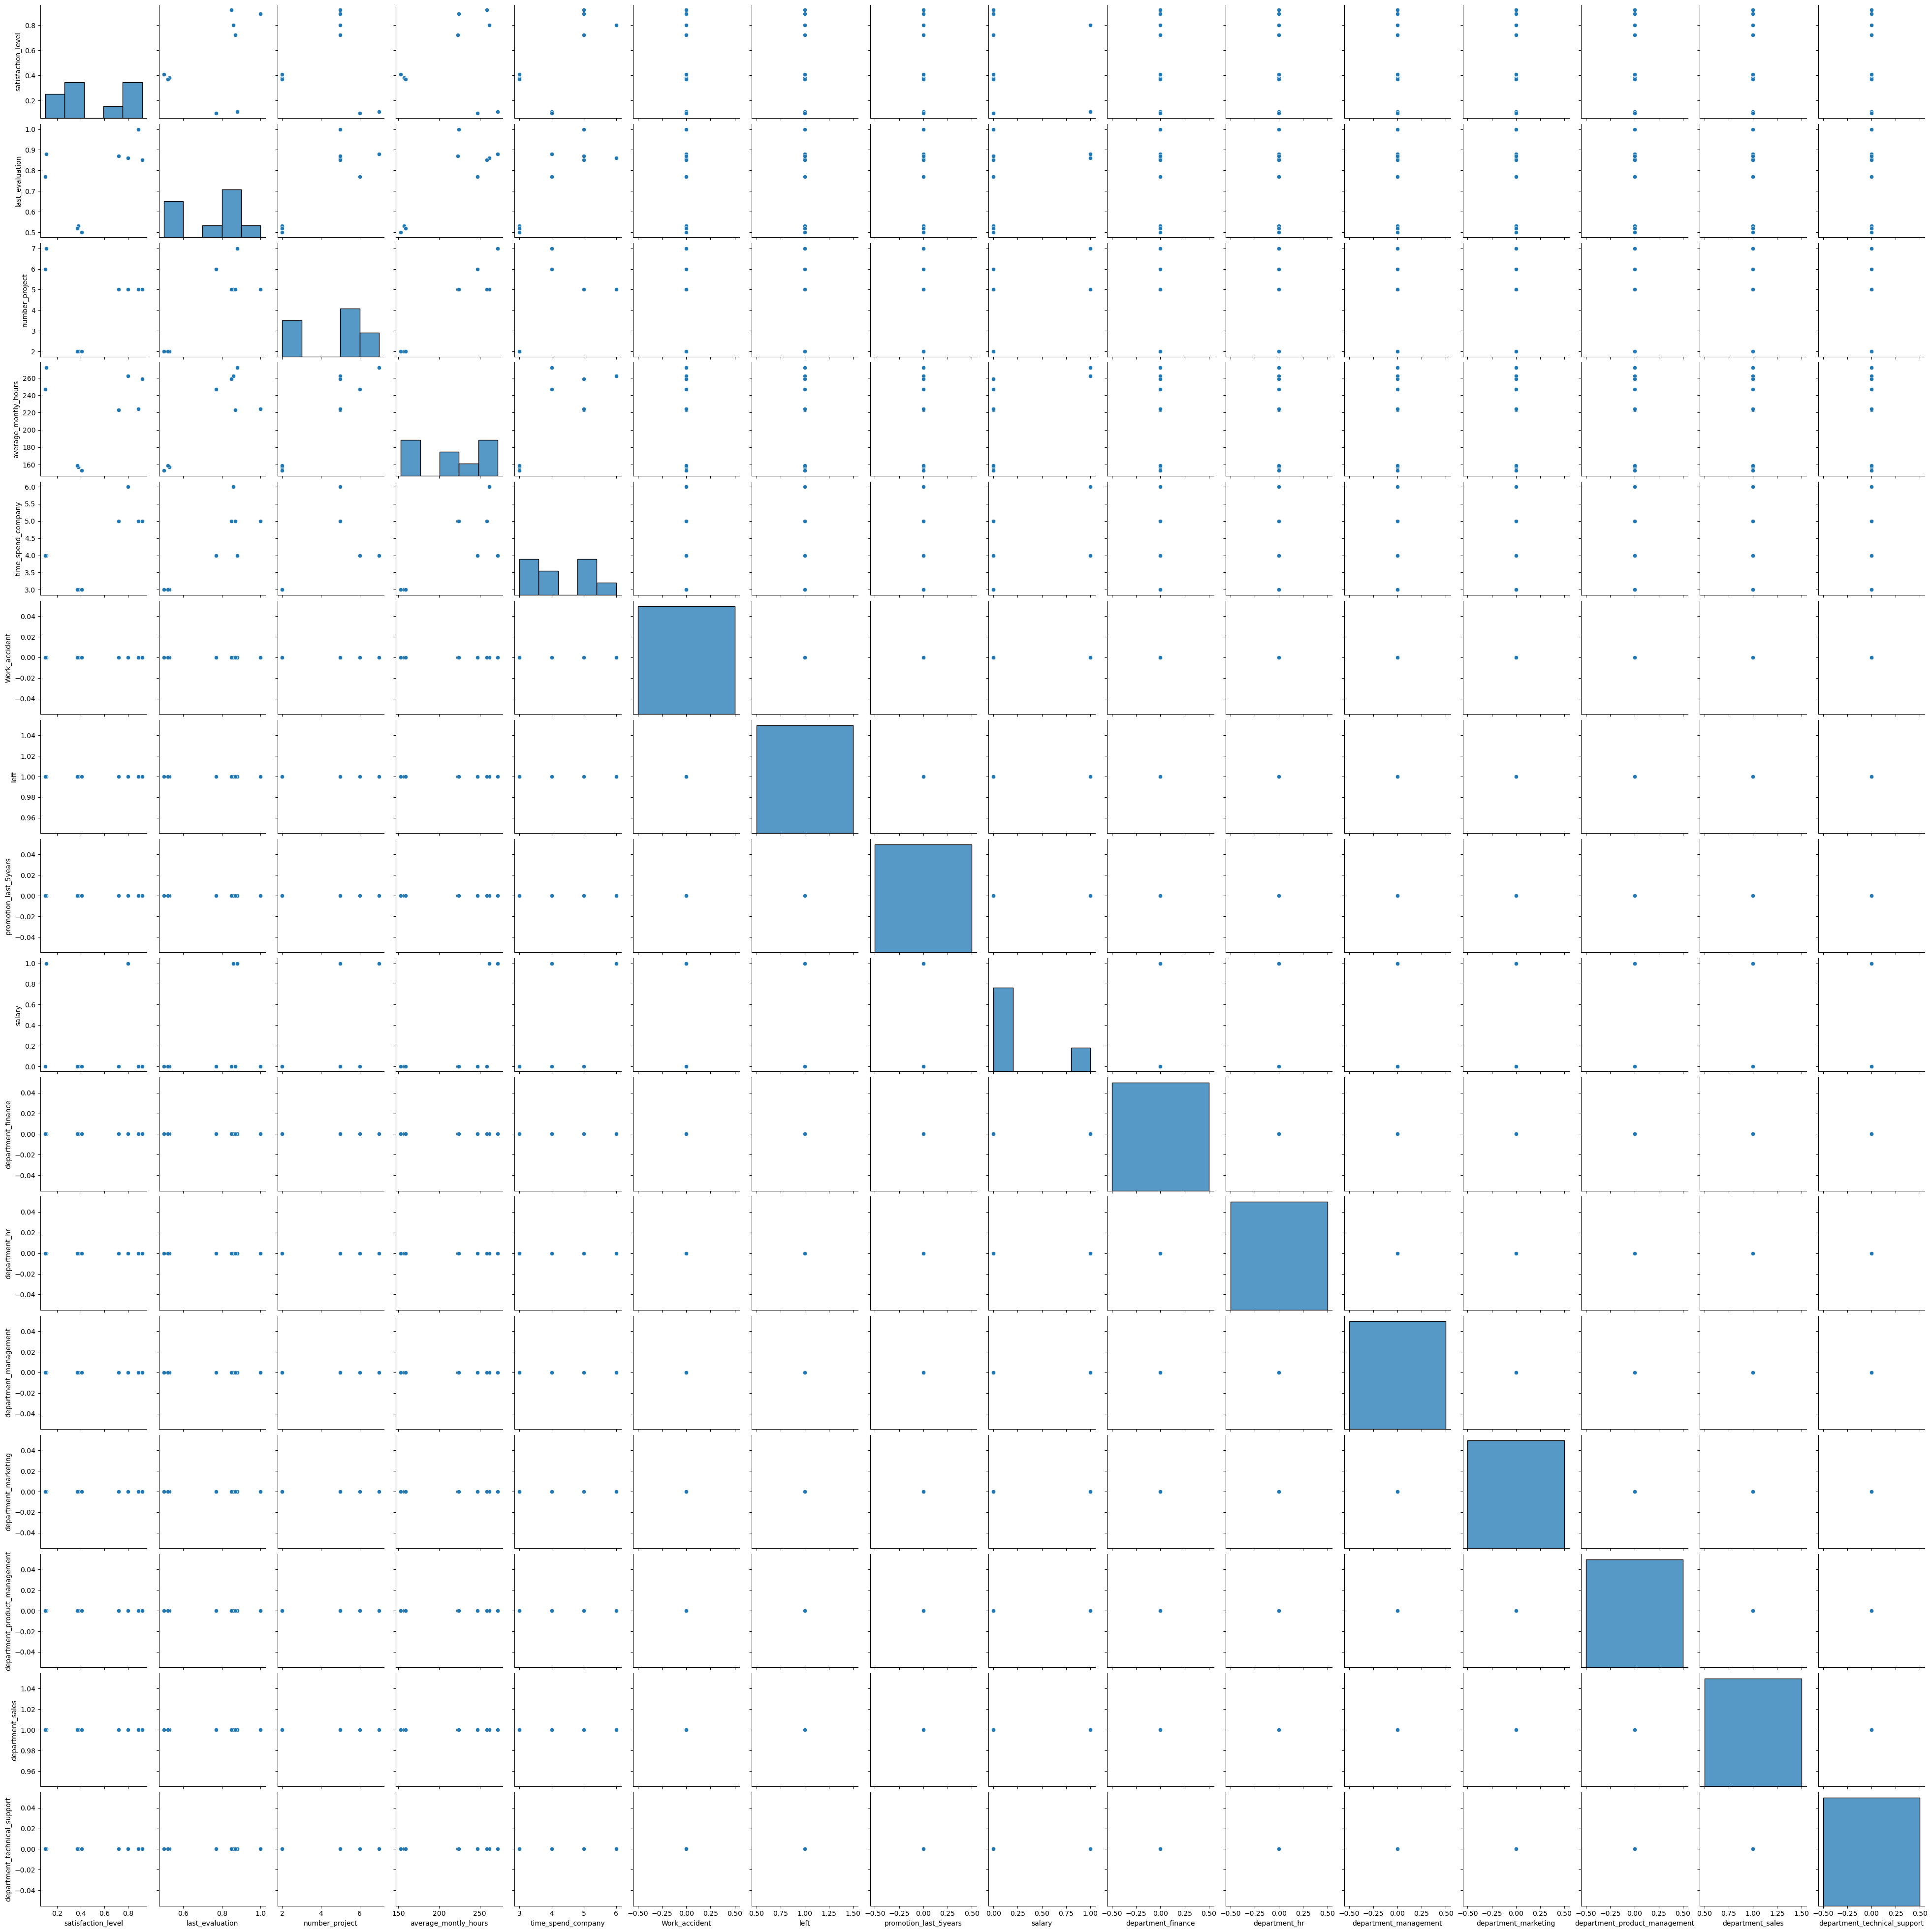

In [306]:
sns.pairplot(data=df[:9])

In [307]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_finance,department_hr,department_management,department_marketing,department_product_management,department_sales,department_technical_support
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,True,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,True,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,True,False


#### Correlation

<Axes: >

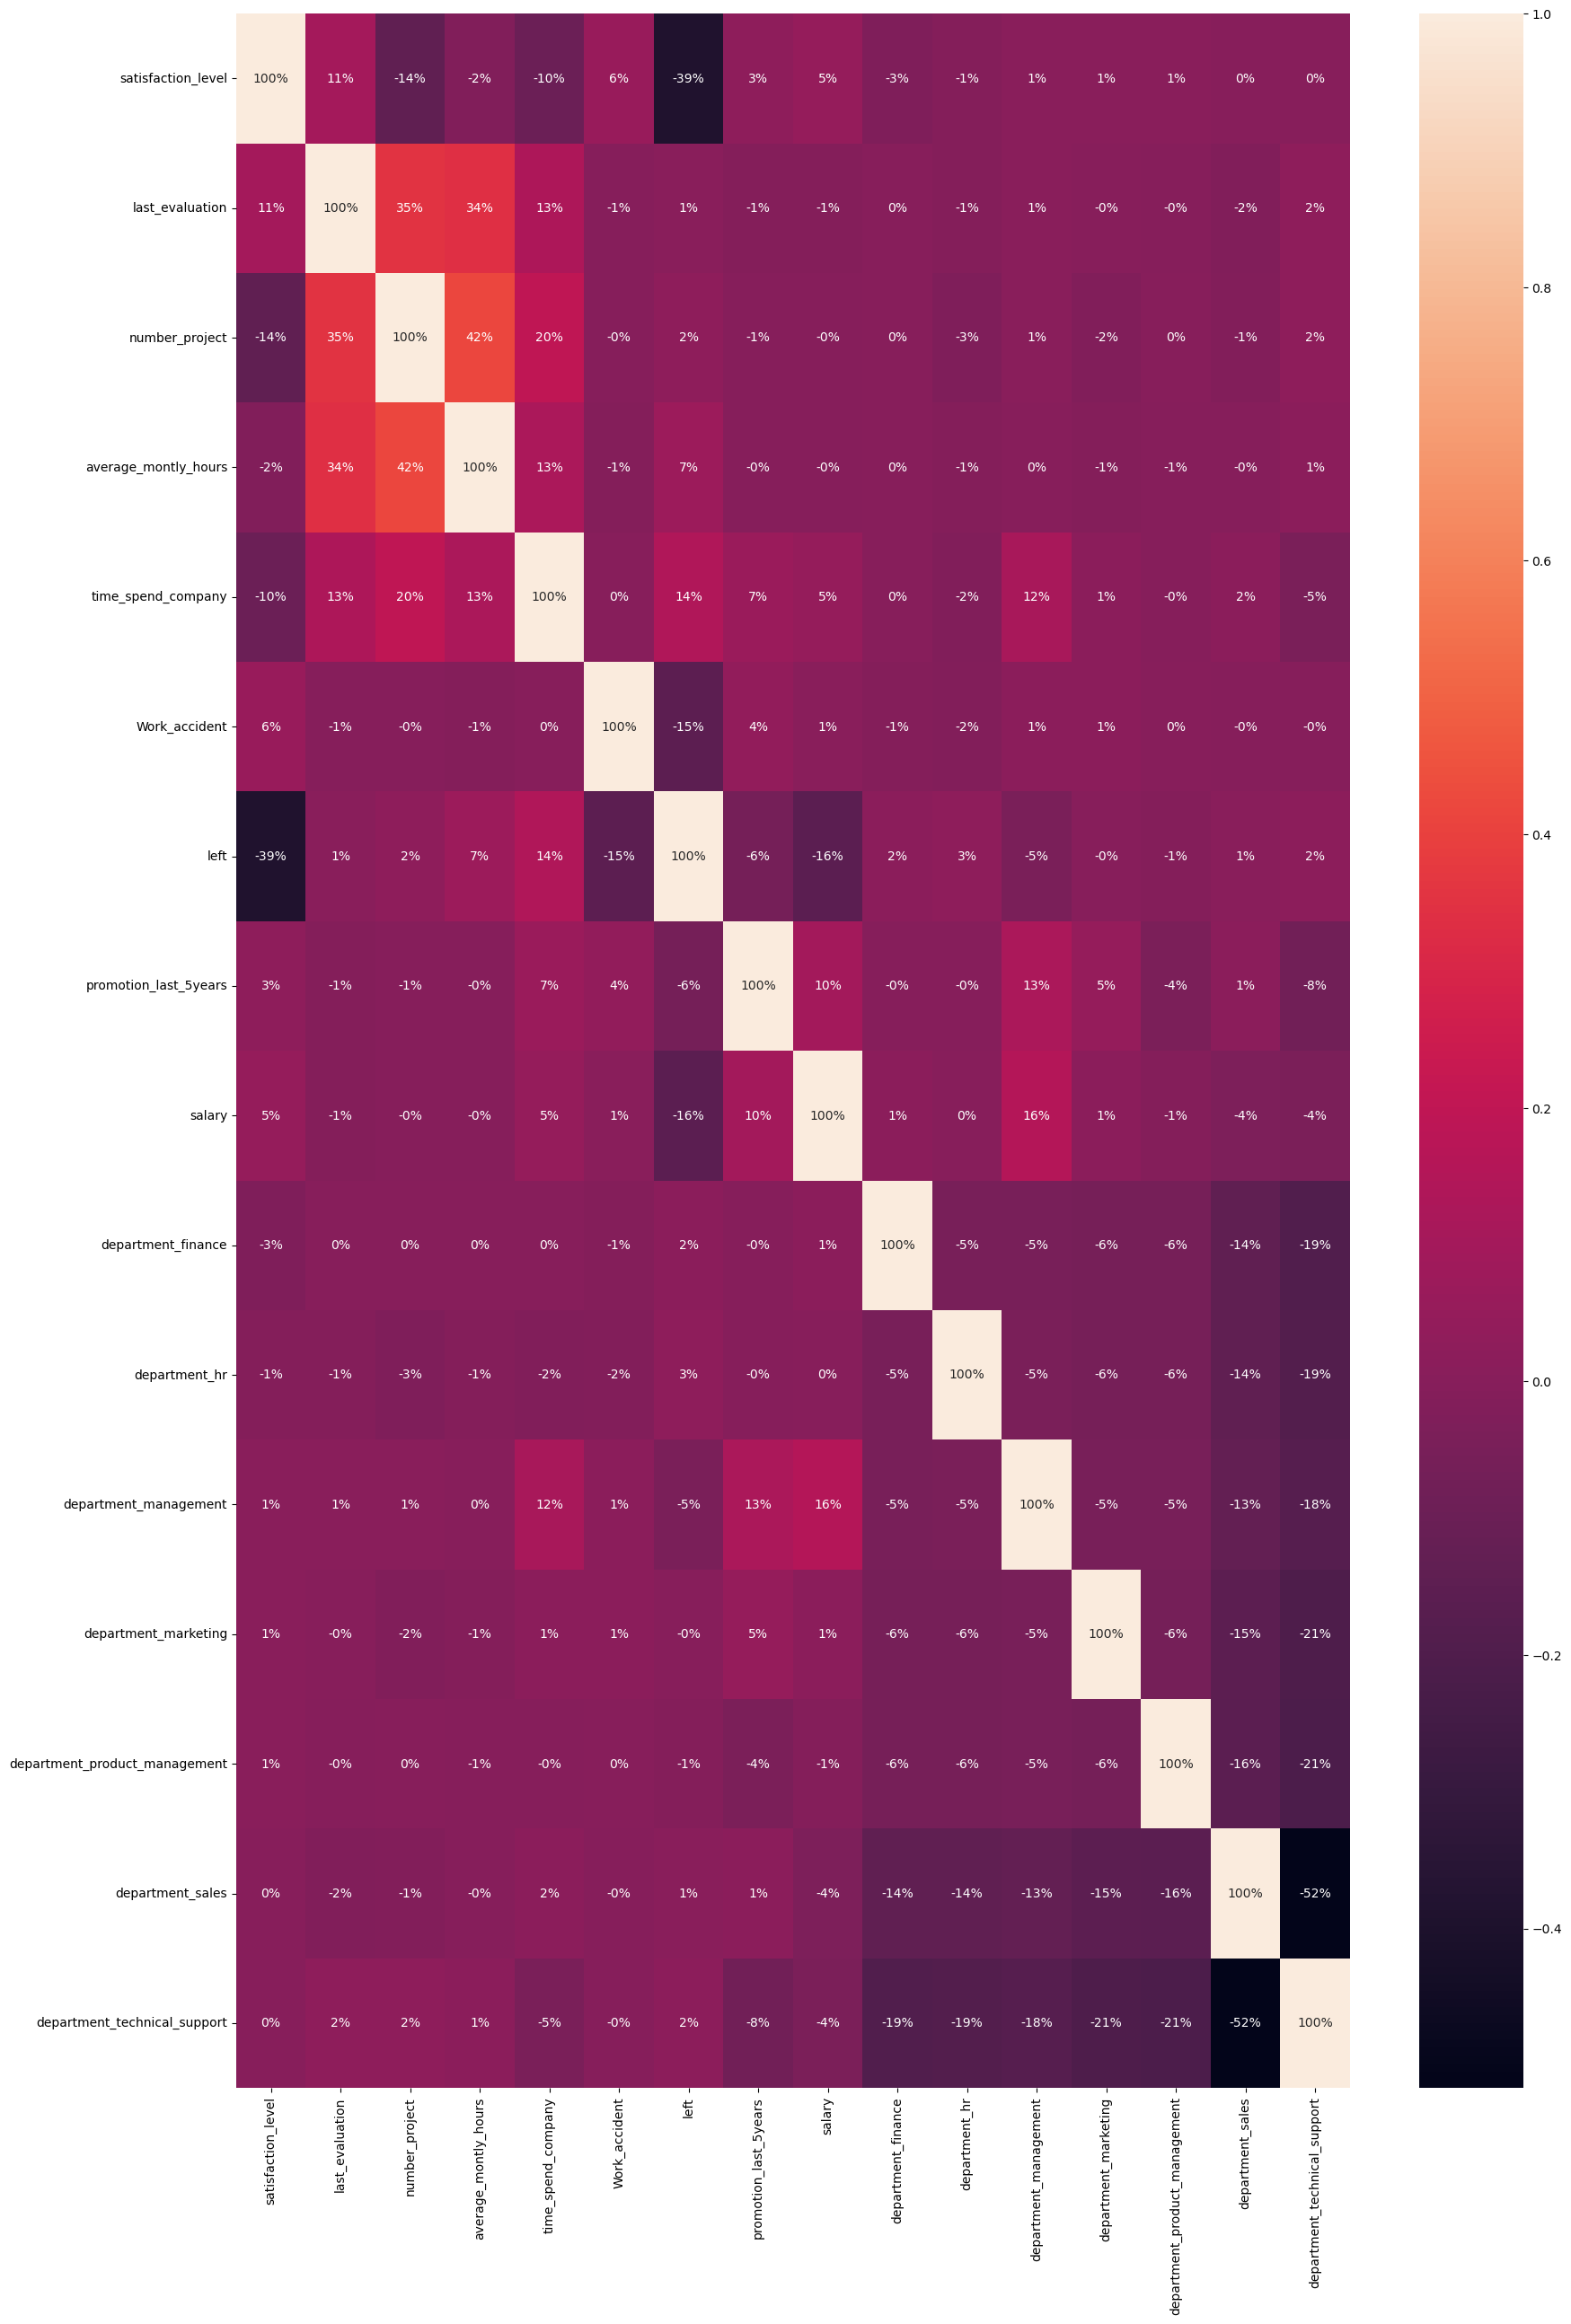

In [308]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

This heat map shows that there is no correlation

In [309]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_finance,department_hr,department_management,department_marketing,department_product_management,department_sales,department_technical_support
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,True,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,True,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,True,False


<br>

### Dependent and Independent Variables

In [310]:
X = df.drop('salary', axis=1)
y = df['salary']

In [311]:
len(X.columns)

15

### Feature Selection

The feature selection step decides which features are best option that can predict employee turnover with great accuracy or great performance.
There are 17 features in X, we can select about 10 from them

In [312]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Initialize RFE with the correct parameter
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE with features and target data
rfe = rfe.fit(X, y)

# Print which features are selected and their ranking
print(rfe.support_)
print(rfe.ranking_)


/Users/manoj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/manoj/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[ True  True False False False False  True  True  True False  True  True
  True  True  True]
[1 1 5 6 4 2 1 1 1 3 1 1 1 1 1]


You can see that feature selection chose the 10 variables for us, which are marked True in the support_ array and marked with a choice “1” in the ranking_array. Now lets have a look at these columns:

In [313]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_finance', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_management', 'department_sales',
       'department_technical_support'],
      dtype='object')

In [314]:
new_cols = ['satisfaction_level', 'last_evaluation','left',
       'promotion_last_5years', 'department_finance',
       'department_management', 'department_marketing',
       'department_product_management', 'department_sales',
       'department_technical_support']

In [315]:
X = df[new_cols]
y = df['salary']

<br>

### Train and Test Split

In [316]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

### Model Building

#### Logistics Regression

In [317]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [318]:
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [319]:
model_logistic.score(X_train, y_train)

0.5012858367463568

In [320]:
model_logistic.score(X_test, y_test)

0.4882222222222222

The accuracy score of the logistic regression is about 0.48 , which is not so good.

In [321]:
joblib.dump(model_logistic, 'logistic_regression_salary_model.pkl')

['logistic_regression_salary_model.pkl']

<br>

#### Decision Tree

In [322]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [323]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [324]:
model_tree.score(X_train, y_train)

0.9032288789408515

In [325]:
model_tree.score(X_test, y_test)

0.5575555555555556

The accuracy score of the Decision Tree model is about 0.55. 

In [326]:
joblib.dump(model_tree, 'decision_tree_salary_model.pkl')

['decision_tree_salary_model.pkl']

<br>

#### Random Forest 

In [327]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [328]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [329]:
model_rf.score(X_train, y_train)

0.9032288789408515

In [330]:
model_rf.score(X_test, y_test)

0.564

The accuracy score of the Random Forest model is about 0.56. 

In [331]:
joblib.dump(model_rf, 'random_forest_salary_model.pkl')

['random_forest_salary_model.pkl']

#### KNN

In [332]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)

In [333]:
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [334]:
model_knn.score(X_train, y_train)

0.6838746547290218

In [335]:
model_knn.score(X_test, y_test)

0.5093333333333333

In [336]:
joblib.dump(model_logistic, 'knn_salary_model.pkl')

['knn_salary_model.pkl']

<br>

### Model Evaluation

Now I will construct a confusion matrix to visualize predictions made by our classifier and evaluate the accuracy of our machine learning classification.

In [337]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61      2159
           1       0.55      0.55      0.55      1958
           2       0.39      0.27      0.32       383

    accuracy                           0.56      4500
   macro avg       0.51      0.48      0.49      4500
weighted avg       0.56      0.56      0.56      4500



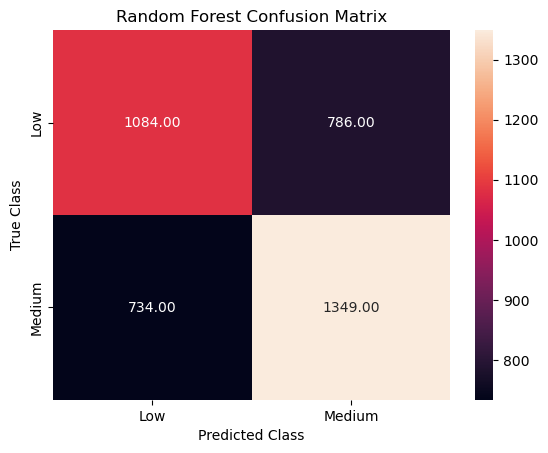

In [338]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using your random forest model
y_pred = model_rf.predict(X_test)

# Generate the confusion matrix with `labels` as a keyword argument
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot the confusion matrix as a heatmap
sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels=["Low", "Medium"], yticklabels=["Low", "Medium"])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest Confusion Matrix')
plt.show()

##### AUC ROC Curve

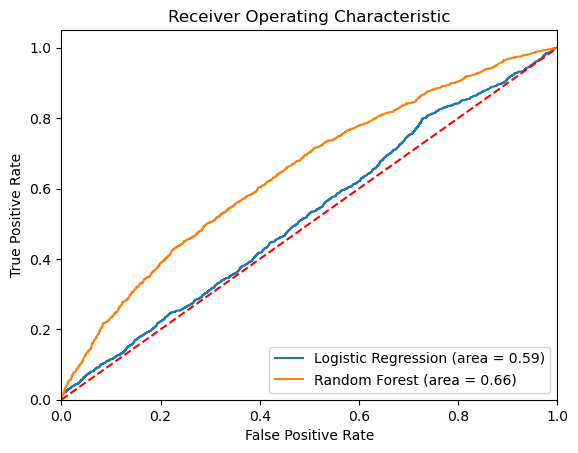

In [339]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict_proba(X_test), multi_class='ovr')
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:, 1], pos_label=1)

# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test), multi_class='ovr')
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label=1)

# Plot ROC Curves
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The receiver operating characteristic (ROC) curve is a standard tool used with binary classifiers. The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

So, as we can see that the Random Forest Model has proven to be more useful in the prediction of employee salary, now let’s have a look at the feature importance of our random forest classification model.

In [340]:
model_rf.feature_importances_

array([0.4503761 , 0.48306708, 0.01469644, 0.00686768, 0.00529079,
       0.0130177 , 0.0059912 , 0.00529569, 0.00765483, 0.00774248])

In [341]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation','left',
       'promotion_last_5years', 'department_finance',
       'department_management', 'department_marketing',
       'department_product_management', 'department_sales',
       'department_technical_support'])
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_finance    -> 0.53%
department_product_management    -> 0.53%
department_marketing    -> 0.60%
promotion_last_5years    -> 0.69%
department_sales    -> 0.77%
department_technical_support    -> 0.77%
department_management    -> 1.30%
left    -> 1.47%
satisfaction_level    -> 45.04%
last_evaluation    -> 48.31%


According to our Random Forest classification model, the above aspects show the most important features which will influence whether an employee will have higher salary or not, in ascending order.

In [342]:
import sklearn
print(sklearn.__version__)

1.3.0
